<a href="https://colab.research.google.com/github/ksetdekov/HSE_DS/blob/master/07%20NLP/kaggle%20hw/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip3 install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ksetdekov","key":"8c4abff92599eb402d83c7a75a6e0341"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle competitions download -c toxic-comments-classification-apdl-2021

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

 bow_v3.csv	    kaggle.json   sample_submission.csv   train_data.csv.zip
'kaggle (1).json'   sample_data   test_data.csv.zip


In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [7]:
train = pd.read_csv('train_data.csv.zip', compression='zip')
test = pd.read_csv('test_data.csv.zip', compression='zip')

In [8]:
train.toxic.describe()

count    10809.000000
mean         0.333796
std          0.471590
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: toxic, dtype: float64

In [9]:
train.sample(5)

,comment,toxic
10685,И кто-то после этого смеет вякать про ужас хру...,0.0
8115,"Жалость то какая, бедные кошки.\n",0.0
1305,"Прям любопытно, какое же слово было изначально.",0.0
5883,"Там, где я был тогда, был только военный госпи...",0.0
10344,"А мне очень понравился выпуск про КиШа, очень ...",0.0


In [10]:
test.sample(5)

,comment_id,comment
610,610,"В банкомате камера,пишите заявление,хоть фото ..."
574,574,"о цене не сообщается SanDisk, если не ошибаюсь..."
1367,1367,"у меня увеличить уже давно не получается, все ..."
3497,3497,Целью встречи стали переговоры о сохранении по...
3417,3417,То есть фильм все таки говно?\n


In [11]:
x_train, x_test, y_train, y_test = train_test_split(train.comment, train.toxic, random_state=0, stratify=train.toxic)

In [12]:
y_train.describe()

count    8106.000000
mean        0.333827
std         0.471608
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: toxic, dtype: float64

In [13]:
y_test.describe()

count    2703.000000
mean        0.333703
std         0.471622
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: toxic, dtype: float64

## Bag of words


In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams

In [15]:
vec = CountVectorizer(ngram_range=(1, 2)) # строим BoW для слов
bow = vec.fit_transform(x_train) 
vec2 = CountVectorizer(ngram_range=(1, 2)) # строим BoW для слов
bow2 = vec2.fit_transform(train.comment) 

In [16]:
list(vec2.vocabulary_.items())[:10]

[('преступление', 170637),
 ('наказание', 116104),
 ('преступление наказание', 170640),
 ('именно', 76167),
 ('эти', 252150),
 ('неработающие', 126648),
 ('весы', 24138),
 ('показывают', 160063),
 ('что', 246112),
 ('работающих', 181878)]

In [17]:
bow.mean()

0.0002405542888719116

In [18]:
clf = LogisticRegression(random_state=0, max_iter=500, class_weight='balanced')
clf.fit(bow, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=0)

In [19]:
clf2 = LogisticRegression(random_state=0, max_iter=500, class_weight='balanced')
clf2.fit(bow2, train.toxic)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=0)

In [20]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      1858
         1.0       0.74      0.79      0.76       845

    accuracy                           0.85      2703
   macro avg       0.82      0.83      0.82      2703
weighted avg       0.85      0.85      0.85      2703



In [21]:
test

,comment_id,comment
0,0,"В данном случае не пионервожатая, а техничка, ..."
1,1,В данном посте рассматривается обычный ленточн...
2,2,"Как я понимаю, у поверхностей отражаемость пог..."
3,3,Австралийские пауки съедят все живое на планете))
4,4,У нас раньше Амур пиво целые бутылки принимал ...
...,...,...
3598,3598,"Я всё жду, когда эта херня закончится\n"
3599,3599,Откуда такой акцент на Москве? У нас между про...
3600,3600,"Кого угодно, но не этих двух отбросов: свинью ..."
3601,3601,А как же радиоуправляемые машинки в клубах?\n


In [22]:
bow_test_pred = test.copy()
bow_test_pred['toxic'] = clf.predict(vec.transform(test.comment))
bow_test_pred['toxic'] = bow_test_pred['toxic'].astype(int)
bow_test_pred.drop('comment', axis=1, inplace=True)
bow_test_pred

,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,1
3601,3601,0


In [23]:
bow_test_pred2 = test.copy()
bow_test_pred2['toxic'] = clf2.predict(vec2.transform(test.comment))
bow_test_pred2['toxic'] = bow_test_pred2['toxic'].astype(int)
bow_test_pred2.drop('comment', axis=1, inplace=True)
bow_test_pred2

,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,1
3601,3601,0


In [24]:
bow_test_pred.to_csv('bow_v1.csv', index=False)
bow_test_pred2.to_csv('bow_v2.csv', index=False)

In [25]:
confusion_matrix(bow_test_pred.toxic, bow_test_pred2.toxic)

array([[2396,   81],
       [  66, 1060]])

In [152]:
# !kaggle competitions submit -c toxic-comments-classification-apdl-2021 -f bow_v2.csv -m "kirill_setdekov first bow v2 submission all data"

100% 23.6k/23.6k [00:09<00:00, 2.45kB/s]
Successfully submitted to Toxic comments classification

## TF-IDF


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf2 = LogisticRegression(random_state=1, max_iter = 500)
clf2.fit(bow, y_train)
pred = clf2.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      2214
         1.0       0.48      0.89      0.63       489

    accuracy                           0.81      2703
   macro avg       0.73      0.84      0.75      2703
weighted avg       0.88      0.81      0.83      2703



In [44]:
tf_idf = test.copy()
tf_idf['toxic'] = clf2.predict(vec.transform(test.comment))
tf_idf['toxic'] = tf_idf['toxic'].astype(int)
tf_idf.drop('comment', axis=1, inplace=True)
tf_idf

,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,0
3601,3601,0


In [45]:
tf_idf.to_csv('tf_idf_v1.csv', index=False)

In [46]:
# !kaggle competitions submit -c toxic-comments-classification-apdl-2021 -f tf_idf_v1.csv -m "kirill_setdekov tfidf v1 submission"

## Symbol n-Grams

In [47]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 5))
bowsimb = vec.fit_transform(x_train)


In [48]:
from sklearn.preprocessing import MaxAbsScaler 
scaler = MaxAbsScaler()
scaler.fit(bowsimb)

MaxAbsScaler(copy=True)

In [49]:
bowsimb = scaler.transform(bowsimb)

In [50]:
clf3 = LogisticRegression(random_state=0,  max_iter=1000)
clf3.fit(bowsimb, y_train)
pred = clf3.predict(scaler.transform(vec.transform(x_test)))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.91      2000
         1.0       0.71      0.91      0.80       703

    accuracy                           0.88      2703
   macro avg       0.84      0.89      0.86      2703
weighted avg       0.90      0.88      0.88      2703



In [51]:
importances = list(zip(vec.vocabulary_, clf.coef_[0]))
importances[0]

('н', 0.6167060139647299)

In [52]:
sorted_importances = sorted(importances, key = lambda x: -abs(x[1]))
sorted_importances[:20]

[('з. чт', 2.4054134367150373),
 ('ы сол', 2.3919589599163023),
 ('ьерн', 2.2785810515459537),
 (' горш', -1.979976614624312),
 ('мотья', 1.7435157860781292),
 ('май, ', 1.7058523876067757),
 ('этой ', 1.6475416855681653),
 ('гора', 1.4710723026209482),
 ('совр', 1.4531765870631195),
 ('их ,', 1.4233307071907748),
 ('я не ', 1.3989481978199367),
 ('т да ', 1.3887901729354284),
 ('ьни м', 1.3499673463315913),
 ('т 8', 1.315935088940947),
 ('м у с', 1.312410067186944),
 ('нубу', 1.2604893126358026),
 ('тушин', -1.2165199192811813),
 ('оркут', -1.215621304958302),
 ('дура ', 1.2140363947432982),
 ('унта ', 1.2002130316125421)]

In [53]:
symbol_ngrams = test.copy()
symbol_ngrams['toxic'] = clf3.predict(scaler.
                                      transform(vec.transform(test.comment)))
symbol_ngrams['toxic'] = tf_idf['toxic'].astype(int)
symbol_ngrams.drop('comment', axis=1, inplace=True)
symbol_ngrams

,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,0
3601,3601,0


In [54]:
symbol_ngrams.to_csv('symbol_ngrams_v1.csv', index=False)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(symbol_ngrams.toxic, tf_idf.toxic)

array([[2918,    0],
       [   0,  685]])

In [57]:
# !kaggle competitions submit -c toxic-comments-classification-apdl-2021 -f symbol_ngrams_v1.csv -m "kirill_setdekov symbol_ngrams_v1 v1 submission"

#FastText

In [7]:
!pip3 install fasttext
import fasttext

     |████████████████████████████████| 68 kB 2.7 MB/s 
  Using cached pybind11-2.8.0-py2.py3-none-any.whl (207 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3119085 sha256=735c99fbd5315605cd10b9a522e6fdfb760f3aa8f0ae77105b4d572b31285bd5
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [12]:
with open('ft_train_data.txt', 'w') as f:
    for pair in list(zip(x_train, y_train)):
        text, label = pair
        f.write(f'__label__{int(label)} {text.lower()}\n')
        
with open('ft_test_data.txt', 'w') as f:
    for pair in list(zip(x_test, y_test)):
        text, label = pair
        f.write(f'__label__{int(label)} {text.lower()}\n')

In [59]:
with open('ft_all.txt', 'w') as f:
    for pair in list(zip(train.comment, train.toxic)):
        text, label = pair
        f.write(f'__label__{int(label)} {text.lower()}\n')
    

In [13]:
classifier = fasttext.train_supervised('ft_train_data.txt')#, 'model')
result = classifier.test('ft_test_data.txt')
print('P@1:', result[1])#.precision)
print('R@1:', result[2])#.recall)
print('Number of examples:', result[0])#.nexamples)

P@1: 0.8146503884572697
R@1: 0.8146503884572697
Number of examples: 2703


In [61]:
classifier2 = fasttext.train_supervised('ft_all.txt')#, 'model')


In [106]:
k = 0
for item in [i.lower() for i in test.comment]:
   item = item.replace("\n"," ")
   k +=1
k

3603

In [120]:
prediction = []
for item in [i.lower() for i in test.comment]:
   item = item.replace("\n"," ")
   prediction.append(classifier.predict(item))

In [121]:
prediction2 = []
for item in [i.lower() for i in test.comment]:
   item = item.replace("\n"," ")
   prediction2.append(classifier2.predict(item))

In [125]:
pred = [int(label[0][0].split('__')[2][0]) for label in prediction]
pred2 = [int(label[0][0].split('__')[2][0]) for label in prediction2]


In [128]:
fasttext_pred = test.copy()
fasttext_pred['toxic'] = pred
fasttext_pred.drop('comment', axis=1, inplace=True)
fasttext_pred

,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,1
3601,3601,0


In [129]:
fasttext_pred2 = test.copy()
fasttext_pred2['toxic'] = pred2
fasttext_pred2.drop('comment', axis=1, inplace=True)
fasttext_pred2

,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,1
3601,3601,0


In [130]:
confusion_matrix(symbol_ngrams.toxic, fasttext_pred.toxic)

array([[2652,  266],
       [  54,  631]])

In [131]:
confusion_matrix(fasttext_pred2.toxic, fasttext_pred.toxic)

array([[2566,   44],
       [ 140,  853]])

In [ ]:
fasttext_pred.to_csv('fasttext_pred_v1.csv', index=False)

In [132]:
fasttext_pred2.to_csv('fasttext_pred_v2.csv', index=False)

In [133]:
!kaggle competitions submit -c toxic-comments-classification-apdl-2021 -f fasttext_pred_v2.csv -m "kirill_setdekov fasttext_pred v2 submission"

100% 23.6k/23.6k [00:07<00:00, 3.36kB/s]
Successfully submitted to Toxic comments classification

## CNN

In [153]:
from torchtext.legacy import data

In [ ]:
pd.read_csv('train_data.csv.zip', compression='zip')

,comment,toxic
0,Преступление и наказание\n,0.0
1,"И именно эти неработающие весы показывают, что...",0.0
2,"В Японии такие панельки, ебанько.\n",0.0
3,Еще у нас выявляют трещины с помощью белой кра...,0.0
4,"Дочитал до поезда в Норильск , дальше не стал\n",0.0
...,...,...
10804,А у мамы в группе до самого выпуска из сада та...,0.0
10805,Сука тупой дегенарт. Вот на эти видео. Съеби у...,1.0
10806,"В племенах украинцев, особенно западных, с дет...",1.0
10807,"Пост про жадность, о том, как человек оплативш...",0.0


In [154]:
!unzip train_data.csv.zip
!unzip test_data.csv.zip


Archive:  train_data.csv.zip
  inflating: train_data.csv          
Archive:  test_data.csv.zip
  inflating: test_data.csv           


In [155]:
# классы Field и LabelField отвечают за то, как данные будут храниться и обрабатываться при считывании
TEXT = data.Field(tokenize='spacy') # spacy -- значит, токенизацию будет делать модуль 
LABEL = data.LabelField()

ds = data.TabularDataset(
  path='train_data.csv', format='csv', 
  skip_header=True,
  fields=[('comment', TEXT),
        ('toxic', LABEL)]
)

In [156]:
pd.read_csv('test_data.csv')

,comment_id,comment
0,0,"В данном случае не пионервожатая, а техничка, ..."
1,1,В данном посте рассматривается обычный ленточн...
2,2,"Как я понимаю, у поверхностей отражаемость пог..."
3,3,Австралийские пауки съедят все живое на планете))
4,4,У нас раньше Амур пиво целые бутылки принимал ...
...,...,...
3598,3598,"Я всё жду, когда эта херня закончится\n"
3599,3599,Откуда такой акцент на Москве? У нас между про...
3600,3600,"Кого угодно, но не этих двух отбросов: свинью ..."
3601,3601,А как же радиоуправляемые машинки в клубах?\n


In [157]:
test = data.TabularDataset(
  path='test_data.csv', format='csv', 
  skip_header=True,
  fields=[('id', TEXT), ('comment', TEXT)]
)

In [158]:
next(ds.comment)

['Преступление', 'и', 'наказание']

In [159]:
next(ds.toxic)

'0.0'

In [160]:
TEXT.build_vocab(ds, max_size=25000, vectors="glove.6B.100d")
LABEL.build_vocab(ds)

.vector_cache/glove.6B.zip: 862MB [02:42, 5.30MB/s]                           
100%|█████████▉| 399999/400000 [00:21<00:00, 18835.77it/s]


In [161]:
TEXT.vocab.itos[:20]

['<unk>',
 '<pad>',
 ',',
 '.',
 'и',
 'в',
 'не',
 '-',
 'на',
 'что',
 '?',
 'с',
 'то',
 'это',
 'а',
 ')',
 'как',
 'по',
 'за',
 'у']

In [162]:
len(TEXT.vocab.itos)

25002

In [165]:
train, val = ds.split(split_ratio=0.9, stratified=True, strata_field='toxic') # дефолтное соотношение 0.7


In [166]:
print(len(train))
print(len(val))
print(len(test))

9728
1081
3603


In [167]:
BATCH_SIZE  = 64

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train, val, test), 
    batch_size=BATCH_SIZE, 
    sort=True,
    sort_key=lambda x: len(x.comment), # сорируем тексты по длине, чтобы рядом оказывались предложения с одинаковой длиной и добавлялось меньше паддинга
    repeat=False)

In [168]:
for i, batch in enumerate(valid_iterator):
  print(batch.batch_size)
  # pass

64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
57


In [169]:
batch.fields

dict_keys(['comment', 'toxic'])

In [170]:
batch.batch_size

57

In [171]:
batch.comment

tensor([[ 2133, 14508,  2138,  ...,    22,  2523,    36],
        [  207, 17726,    53,  ...,    26,    20,     0],
        [15018,  9861,  2819,  ...,    51,     0,  1086],
        ...,
        [ 2082,     1,     1,  ...,     1,     1,     1],
        [    5,     1,     1,  ...,     1,     1,     1],
        [  721,     1,     1,  ...,     1,     1,     1]])

In [172]:
batch.toxic

tensor([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0])

In [173]:
len(batch.toxic)

57

In [174]:
import torch.nn as nn

In [175]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_proba):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[0], embedding_dim))
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[1], embedding_dim))
        self.conv_2 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[2], embedding_dim))
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout_proba)
        
    def forward(self, x):
        #x = [sent len, batch size]
        # print(x.shape)
        x = x.permute(1, 0)
                
        #x = [batch size, sent len]
        embedded = self.embedding(x)
        #print(embedded.shape)
                
        #embedded = [batch size, sent len, emb dim]
        embedded = embedded.unsqueeze(1)
        
        
        #embedded = [batch size, 1, sent len, emb dim]
        conv_0 = self.conv_0(embedded)
        #print(conv_0.shape)
        conv_0 = conv_0.squeeze(3)
        #print(conv_0.shape)
        conved_0 = F.relu(conv_0)
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        # print(conved_0.shape)
        pool_0 = F.max_pool1d(conved_0, conved_0.shape[2])
        # print(pool_0.shape)

        pooled_0 = pool_0.squeeze(2)
        # print(pooled_0.shape)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        
        #pooled_n = [batch size, n_filters]
        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2), dim=1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        return self.fc(cat)

In [176]:
import torch.nn.functional as F

def binary_accuracy(preds, y):
    rounded_preds = torch.round(F.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [177]:
def train_func(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        optimizer.zero_grad()
        
        predictions = model(batch.comment.cuda()).squeeze(1)

        loss = criterion(predictions.float(), batch.toxic.float().cuda())
        acc = binary_accuracy(predictions.float(), batch.toxic.float().cuda())
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss
        epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [178]:
def evaluate_func(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.comment.cuda()).squeeze(1)

            loss = criterion(predictions.float(), batch.toxic.float().cuda())
            acc = binary_accuracy(predictions.float(), batch.toxic.float().cuda())

            epoch_loss += loss
            epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [179]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = 1
DROPOUT_PROBA = 0.5

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT_PROBA)

In [180]:
INPUT_DIM

25002

In [181]:
model

CNN(
  (embedding): Embedding(25002, 100)
  (conv_0): Conv2d(1, 100, kernel_size=(2, 100), stride=(1, 1))
  (conv_1): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
  (conv_2): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [182]:
pretrained_embeddings = TEXT.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1077,  0.1105,  0.5981,  ..., -0.8316,  0.4529,  0.0826],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [183]:
import torch.optim as optim

In [184]:
optimizer = optim.Adam(model.parameters()) # мы подали оптимизатору все параметры -- значит, эмбеддиги тоже будут дообучаться
criterion = nn.BCEWithLogitsLoss() # бинарная кросс-энтропия с логитами

model = model.cuda() # будем учить на gpu! =)

In [185]:
model.embedding

Embedding(25002, 100)

In [186]:
from torchsummary import summary

# summary(model, (14))


In [187]:
import torch

In [188]:
N_EPOCHS = 8

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_func(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate_func(model, valid_iterator, criterion)
    
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val. Loss: {valid_loss:.3f}, Val. Acc: {valid_acc*100:.2f}%')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 01, Train Loss: 0.588, Train Acc: 67.42%, Val. Loss: 0.560, Val. Acc: 70.71%
Epoch: 02, Train Loss: 0.446, Train Acc: 79.39%, Val. Loss: 0.516, Val. Acc: 77.84%
Epoch: 03, Train Loss: 0.304, Train Acc: 88.07%, Val. Loss: 0.480, Val. Acc: 79.78%
Epoch: 04, Train Loss: 0.183, Train Acc: 93.59%, Val. Loss: 0.471, Val. Acc: 81.63%
Epoch: 05, Train Loss: 0.107, Train Acc: 96.48%, Val. Loss: 0.446, Val. Acc: 83.26%
Epoch: 06, Train Loss: 0.067, Train Acc: 97.79%, Val. Loss: 0.393, Val. Acc: 85.85%
Epoch: 07, Train Loss: 0.044, Train Acc: 98.58%, Val. Loss: 0.422, Val. Acc: 85.09%
Epoch: 08, Train Loss: 0.026, Train Acc: 99.24%, Val. Loss: 0.466, Val. Acc: 85.01%


In [189]:
test.examples

 ...]

In [190]:
model.eval()
cnn_res = []
with torch.no_grad():
    for batch in test_iterator:
        predictions = model(batch.comment.cuda())
        cnn_res.append(predictions)
        

In [191]:
testout = pd.read_csv('test_data.csv.zip', compression='zip')

In [192]:
cnnpred = testout.copy()
cnnpred['toxic'] = [float(item) for sublist in cnn_res for item in sublist]
cnnpred.drop('comment', axis=1, inplace=True)
cnnpred

,comment_id,toxic
0,0,-6.444256
1,1,2.917760
2,2,0.926207
3,3,-4.977346
4,4,4.183296
...,...,...
3598,3598,-6.071583
3599,3599,-3.199416
3600,3600,-2.508766
3601,3601,-6.233222


In [196]:
cnnpred['toxic'] = (cnnpred['toxic'] > 0).astype(int)
cnnpred

,comment_id,toxic
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
3598,3598,0
3599,3599,0
3600,3600,0
3601,3601,0


In [197]:
cnnpred.to_csv('cnnpred_v4.csv', index=False)

In [198]:
!kaggle competitions submit -c toxic-comments-classification-apdl-2021 -f cnnpred_v4.csv -m "kirill_setdekov cnn v4 with threshold 0"

100% 23.6k/23.6k [00:04<00:00, 4.90kB/s]
Successfully submitted to Toxic comments classification

# word2vec


> not done, skip this model



In [ ]:
! wget https://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
with open("alice.txt", 'r', encoding='utf-8') as f:
    text = f.read()

text = re.sub('\n', ' ', text)
sents = sent_tokenize(text)

punct = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-‘’'
clean_sents = []

for sent in sents:
    s = [w.lower().strip(punct) for w in sent.split()]
    clean_sents.append(s)
    
print(clean_sents[:2])

In [ ]:
model_path = "movie_reviews.model"

print("Saving model...")
model_en.save(model_path)

In [ ]:
model = word2vec.Word2Vec.load(model_path)

model.build_vocab(clean_sents, update=True)
model.train(clean_sents, total_examples=model.corpus_count, epochs=5)

# bow on random forest

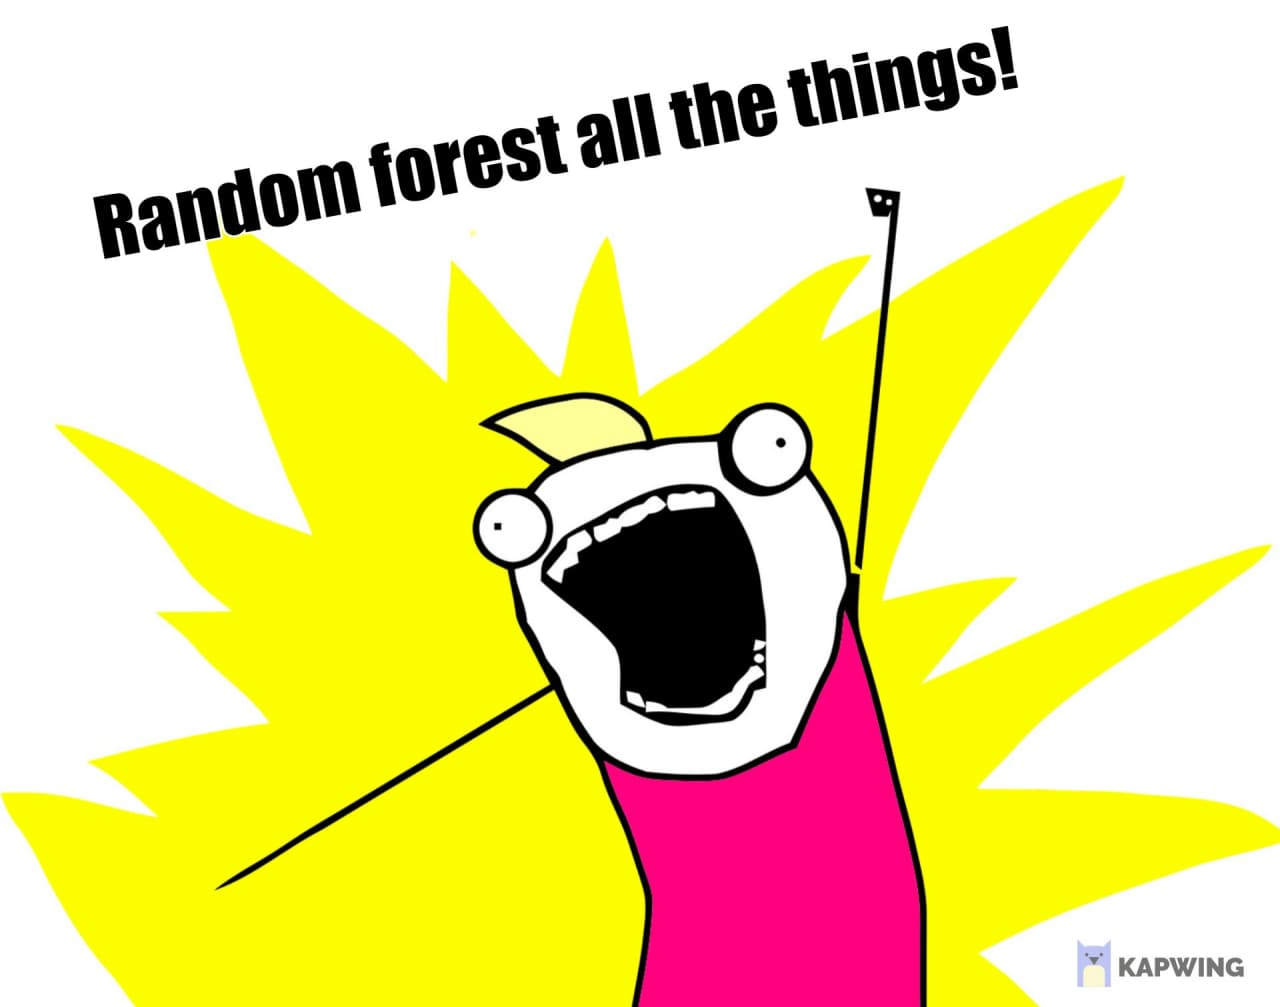

In [26]:
! pip install  pymystem3

In [27]:
! pip install --force-reinstall  pymorphy2 


  Using cached pymorphy2-0.9.1-py3-none-any.whl (55 kB)
  Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl (11 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached pymorphy2_dicts_ru-2.4.417127.4579844-py2.py3-none-any.whl (8.2 MB)
  Attempting uninstall: pymorphy2-dicts-ru
    Found existing installation: pymorphy2-dicts-ru 2.4.417127.4579844
    Uninstalling pymorphy2-dicts-ru-2.4.417127.4579844:
      Successfully uninstalled pymorphy2-dicts-ru-2.4.417127.4579844
  Attempting uninstall: docopt
    Found existing installation: docopt 0.6.2
    Uninstalling docopt-0.6.2:
      Successfully uninstalled docopt-0.6.2
  Attempting uninstall: dawg-python
    Found existing installation: DAWG-Python 0.7.2
    Uninstalling DAWG-Python-0.7.2:
      Successfully uninstalled DAWG-Python-0.7.2
  Attempting uninstall: pymorphy2
    Found existing installation: pymorphy2 0.9.1
    Uninstalling pymorphy2-0.9.1:
      Successfully uninstalled pymorphy2-0.9.1


In [28]:
!pip install  pymorphy2-dicts-ru

In [29]:
import pymorphy2
import re

morph = pymorphy2.MorphAnalyzer()

In [30]:

# убираем все небуквенные символы
regex = re.compile("[А-Яа-яA-z]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

In [31]:
for i in train.comment[10].split():
  lemmas = morph.parse(i)
  print(lemmas[0])

Parse(word='куколдыш', tag=OpencorporaTag('NOUN,anim,masc,Sgtm,Surn sing,nomn'), normal_form='куколдыш', score=0.14285714285714285, methods_stack=((FakeDictionary(), 'куколдыш', 84, 0), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'лдыш')))
Parse(word='иди', tag=OpencorporaTag('VERB,impf,intr sing,impr,excl'), normal_form='идти', score=1.0, methods_stack=((DictionaryAnalyzer(), 'иди', 1696, 13),))
Parse(word='значение', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='значение', score=0.625, methods_stack=((DictionaryAnalyzer(), 'значение', 77, 6),))
Parse(word='выучи,', tag=OpencorporaTag('UNKN'), normal_form='выучи,', score=1.0, methods_stack=((UnknAnalyzer(), 'выучи,'),))
Parse(word='мурло', tag=OpencorporaTag('NOUN,inan,neut,Sgtm sing,nomn'), normal_form='мурло', score=0.5, methods_stack=((DictionaryAnalyzer(), 'мурло', 110, 0),))
Parse(word='скоро', tag=OpencorporaTag('ADVB'), normal_form='скоро', score=0.964285, methods_stack=((DictionaryAnalyzer(), 

In [32]:
from functools import lru_cache


In [33]:
@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=morph):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

In [34]:
tokens = words_only(train.comment[10])

print(lemmatize_text(tokens))

['куколдыш', 'идти', 'значение', 'выучить', 'мурло', 'скоро', 'и', 'ты', 'пиздарик', 'наступить', 'что', 'сделать', 'насресть', 'под', 'дверь', 'чмо']


In [35]:
from nltk.corpus import stopwords


In [36]:
import nltk

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
mystopwords = stopwords.words('russian') 

def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords]

In [39]:
lemmas = lemmatize_text(tokens)

print(*remove_stopwords(lemmas))

куколдыш идти значение выучить мурло скоро пиздарик наступить сделать насресть дверь чмо


In [40]:
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

In [41]:
print(*remove_stopwords(lemmas))

куколдыш идти значение выучить мурло скоро пиздарик наступить сделать насресть дверь


In [42]:
def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)
    
    return remove_stopwords(lemmas)

In [43]:
for i in range(20):
  print(* clean_text(train.comment[i]))

преступление наказание
именно неработающий весы показывать работать
япония панелька ебанько
выявлять трещина помощь белый краска магнитная краска прислонять большой магнит трещина проявляться знать метод называться труба проверять
дочитать поезд норильск далёкий стать
весь нужно перестать бухать вывести остаток токсин организм внезапно жизнь начинать играть новый краска чистый физиология психология хотя отказ транк доступный транк легализовать наркотик скорее весь прич депрессия таковой существовать вообще принцип просто состояние который индивид начинать вгонять оправдявый вступление тропа саморазрушение депрессия край полежать дать вино дать гкий наркотик тяжёлый депрессия просто деструктивизм сознательный аморализация надежда найда пойма нужно выплакаться жилетка состояние просто щелчок палец выйти затягивать многий затягивать самый вчерашний каприз становиться настоящий личностный проблема просто делать нужно
независимый оператор хохол пытаться промутить
ответ батя говорить аккале


In [44]:
from tqdm.auto import trange

In [45]:
new_comments = []
for i in trange(len(train.comment), desc='loop'):
  new_comments.append(" ".join(clean_text(train.comment[i])))


loop:   0%|          | 0/10809 [00:00<?, ?it/s]

In [46]:
new_comments[:10]

['преступление наказание',
 'именно неработающий весы показывать работать',
 'япония панелька ебанько',
 'выявлять трещина помощь белый краска магнитная краска прислонять большой магнит трещина проявляться знать метод называться труба проверять',
 'дочитать поезд норильск далёкий стать',
 'весь нужно перестать бухать вывести остаток токсин организм внезапно жизнь начинать играть новый краска чистый физиология психология хотя отказ транк доступный транк легализовать наркотик скорее весь прич депрессия таковой существовать вообще принцип просто состояние который индивид начинать вгонять оправдявый вступление тропа саморазрушение депрессия край полежать дать вино дать гкий наркотик тяжёлый депрессия просто деструктивизм сознательный аморализация надежда найда пойма нужно выплакаться жилетка состояние просто щелчок палец выйти затягивать многий затягивать самый вчерашний каприз становиться настоящий личностный проблема просто делать нужно',
 'независимый оператор хохол пытаться промутить',

In [47]:
vec3 = CountVectorizer(ngram_range=(1, 2)) # строим BoW для слов
bow3 = vec3.fit_transform(new_comments) 

In [48]:
list(vec3.vocabulary_.items())[100:120]

[('тяжёлый', 147571),
 ('деструктивизм', 30158),
 ('сознательный', 134042),
 ('аморализация', 3427),
 ('надежда', 69603),
 ('найда', 70280),
 ('пойма', 97666),
 ('выплакаться', 21037),
 ('жилетка', 37146),
 ('щелчок', 161656),
 ('палец', 89005),
 ('выйти', 20633),
 ('затягивать', 41691),
 ('многий', 65910),
 ('самый', 124255),
 ('вчерашний', 19763),
 ('каприз', 49214),
 ('становиться', 137778),
 ('настоящий', 72325),
 ('личностный', 59828)]

In [49]:
bow3

<10809x163748 sparse matrix of type '<class 'numpy.int64'>'
	with 295815 stored elements in Compressed Sparse Row format>

In [50]:
clf3 = LogisticRegression(random_state=0, max_iter=500, class_weight='balanced')
clf3.fit(bow3, train.toxic)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=0)

In [51]:
pred = clf3.predict(bow3)
print(classification_report(pred, train.toxic))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      7148
         1.0       1.00      0.98      0.99      3661

    accuracy                           0.99     10809
   macro avg       1.00      0.99      0.99     10809
weighted avg       0.99      0.99      0.99     10809



In [52]:
test

,comment_id,comment
0,0,"В данном случае не пионервожатая, а техничка, ..."
1,1,В данном посте рассматривается обычный ленточн...
2,2,"Как я понимаю, у поверхностей отражаемость пог..."
3,3,Австралийские пауки съедят все живое на планете))
4,4,У нас раньше Амур пиво целые бутылки принимал ...
...,...,...
3598,3598,"Я всё жду, когда эта херня закончится\n"
3599,3599,Откуда такой акцент на Москве? У нас между про...
3600,3600,"Кого угодно, но не этих двух отбросов: свинью ..."
3601,3601,А как же радиоуправляемые машинки в клубах?\n


In [53]:
new_commentstest = []
for i in trange(len(test.comment), desc='loop'):
  new_commentstest.append(" ".join(clean_text(test.comment[i])))

loop:   0%|          | 0/3603 [00:00<?, ?it/s]

In [54]:
bow_test_pred3 = test.copy()
bow_test_pred3['newcomment'] = new_commentstest
bow_test_pred3.tail()

,comment_id,comment,newcomment
3598,3598,"Я всё жду, когда эта херня закончится\n",ждать херня закончиться
3599,3599,Откуда такой акцент на Москве? У нас между про...,откуда акцент москва прочить многонациональный...
3600,3600,"Кого угодно, но не этих двух отбросов: свинью ...",угодный отброс свинья недоразвитый даун
3601,3601,А как же радиоуправляемые машинки в клубах?\n,радиоуправляемый машинка клуб
3602,3602,Правильно. Кз 10 и версия драйверов 10.х без э...,правильно версия драйвер работать


In [55]:
bow_test_pred3['toxic'] = clf3.predict(vec3.transform(bow_test_pred3.newcomment))
bow_test_pred3['toxic'] = bow_test_pred3['toxic'].astype(int)
bow_test_pred3.drop('comment', axis=1, inplace=True)
bow_test_pred3.drop('newcomment', axis=1, inplace=True)

bow_test_pred3

,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,1
3601,3601,0


In [56]:
confusion_matrix(bow_test_pred2.toxic, bow_test_pred3.toxic)

array([[2220,  242],
       [ 246,  895]])

In [57]:
bow_test_pred3.to_csv('bow_v3.csv', index=False)

In [58]:
# !kaggle competitions submit -c toxic-comments-classification-apdl-2021 -f bow_v3.csv -m "kirill_setdekov bow3 with preprocessing"

In [59]:
!pip install scikit-learn==0.24

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

nor run -too slow

In [71]:
# rnd_reg = RandomForestClassifier( )

# # hyper-parameter space
# param_grid_RF = {
#     'n_estimators' : [10,20,50,100,200,500,1000],
#     'max_features' : [0.6,0.8,"auto","sqrt"],
# }

# search_two = HalvingGridSearchCV(rnd_reg, param_grid_RF, factor=5, scoring='accuracy',
#                       n_jobs=-1, random_state=0, verbose=2).fit(bow3, train.toxic)

# search_two.best_params_

In [69]:
rnd_reg_2 = RandomForestClassifier(n_estimators=1000, verbose=5, n_jobs=-1)

In [70]:
search_no = rnd_reg_2.fit(bow3, train.toxic)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.3s


building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   42.8s


building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000
building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000
building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 10

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min


building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.0min


building tree 286 of 1000
building tree 287 of 1000
building tree 288 of 1000
building tree 289 of 1000
building tree 290 of 1000
building tree 291 of 1000
building tree 292 of 1000
building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000
building tree 317 of 1000
building tree 318 of 1000
building tree 319 of 1000
building tree 320 of 1000
building tree 321 of 1000
building tree 322 of 1000
building tree 323 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.7min


building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tree 453 of 1000
building tree 454 of 1000
building tree 455 of 1000
building tree 456 of 1000
building tree 457 of 1000
building tree 458 of 1000
building tree 459 of 1000
building tree 460 of 1000
building tree 461 of 1000
building tree 462 of 1000
building tree 463 of 1000
building tree 464 of 1000
building tree 465 of 1000
building tree 466 of 1000
building tree 467 of 1000
building tree 468 of 1000
building tree 469 of 1000
building tree 470 of 1000
building tree 471 of 1000
building tree 472 of 1000
building tree 473 of 1000
building tree 474 of 1000
building tree 475 of 1000
building tree 476 of 1000
building tree 477 of 1000
building tree 478 of 1000
building tree 479 of 1000
building tree 480 of 1000
building tree 481 of 1000
building tree 482 of 1000
building tree 483 of 1000
building tree 484 of 1000
building tree 485 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.8min


building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  9.2min


building tree 880 of 1000
building tree 881 of 1000
building tree 882 of 1000
building tree 883 of 1000
building tree 884 of 1000
building tree 885 of 1000
building tree 886 of 1000
building tree 887 of 1000
building tree 888 of 1000
building tree 889 of 1000
building tree 890 of 1000
building tree 891 of 1000
building tree 892 of 1000
building tree 893 of 1000
building tree 894 of 1000
building tree 895 of 1000
building tree 896 of 1000
building tree 897 of 1000
building tree 898 of 1000
building tree 899 of 1000
building tree 900 of 1000
building tree 901 of 1000
building tree 902 of 1000
building tree 903 of 1000
building tree 904 of 1000
building tree 905 of 1000
building tree 906 of 1000
building tree 907 of 1000
building tree 908 of 1000
building tree 909 of 1000
building tree 910 of 1000
building tree 911 of 1000
building tree 912 of 1000
building tree 913 of 1000
building tree 914 of 1000
building tree 915 of 1000
building tree 916 of 1000
building tree 917 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 10.5min finished


In [72]:
bow_test_pred4 = test.copy()
bow_test_pred4['newcomment'] = new_commentstest
bow_test_pred4.tail()

,comment_id,comment,newcomment
3598,3598,"Я всё жду, когда эта херня закончится\n",ждать херня закончиться
3599,3599,Откуда такой акцент на Москве? У нас между про...,откуда акцент москва прочить многонациональный...
3600,3600,"Кого угодно, но не этих двух отбросов: свинью ...",угодный отброс свинья недоразвитый даун
3601,3601,А как же радиоуправляемые машинки в клубах?\n,радиоуправляемый машинка клуб
3602,3602,Правильно. Кз 10 и версия драйверов 10.х без э...,правильно версия драйвер работать


In [73]:
bow_test_pred4['toxic'] = search_no.predict(vec3.transform(bow_test_pred4.newcomment))
bow_test_pred4['toxic'] = bow_test_pred4['toxic'].astype(int)
bow_test_pred4.drop('comment', axis=1, inplace=True)
bow_test_pred4.drop('newcomment', axis=1, inplace=True)

bow_test_pred4

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done 878 tasks      | elapsed:    5.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    5.8s finished


,comment_id,toxic
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3598,3598,1
3599,3599,0
3600,3600,1
3601,3601,0


In [74]:
confusion_matrix(bow_test_pred4.toxic, bow_test_pred3.toxic)

array([[2448,  383],
       [  18,  754]])

In [76]:
bow_test_pred4.to_csv('bow_v4.csv', index=False)

In [77]:
!kaggle competitions submit -c toxic-comments-classification-apdl-2021 -f bow_v4.csv -m "kirill_setdekov bow4 with preprocessing and RF"

100% 23.6k/23.6k [00:04<00:00, 5.15kB/s]
Successfully submitted to Toxic comments classification